In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
# Inequality Data 
c_hi = pd.read_csv("Coefficient of Human Inequality_1.csv", na_values=['..'])
gii =  pd.read_csv("Gender_Inequality_Index.csv", na_values=['..'])
gini =  pd.read_csv("Income inequality, Gini coefficient.csv", na_values=['..'])
edu =  pd.read_csv("Inequality in education (%).csv", na_values=['..', ''])
gdp = pd.read_csv('GDP_per_cap_(2011 PPP $).csv', na_values=['..'])
life_exp = pd.read_csv("Inequality in life expectancy (%).csv", na_values=['..'])
inc = pd.read_csv("Inequality in income (%).csv", na_values=['..'])
mpi = pd.read_csv('Multidimensional poverty index (MPI).csv', na_values=['..'])
pov = pd.read_csv("Population living below income poverty line, PPP $1.90 a day (%).csv", na_values=['..', '#VALUE!'])


# Happiness!
happiness_2015 = pd.read_csv("2015.csv")
happiness_2016 = pd.read_csv("2016.csv")
happiness_2017 = pd.read_csv("2017.csv")
happiness_2018 = pd.read_csv("2018.csv")



In [3]:
# Map Data of World 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# removing Anatartica
world = world[(world.pop_est>0) & (world.name!="Antarctica")]


In [4]:
# Cleaning Data to be merged

# Setting Index as country name
c_hi = c_hi.set_index("Country")
gii = gii.set_index("Country")
gini = gini.set_index("Country")
edu = edu.set_index("Country")
happiness_2015 = happiness_2015.set_index("Country")
happiness_2016 = happiness_2016.set_index("Country")
happiness_2017 = happiness_2017.set_index("Country")
happiness_2018 = happiness_2018.set_index("Country or region")
gdp = gdp.set_index("Country")
life_exp = life_exp.set_index("Country")
inc = inc.set_index("Country")
mpi = mpi.set_index("Country")
world = world.set_index('name')
pov = pov.set_index("Country")

# dropping extra columns in poverty dataset
pov = pov.drop(["ref",'ref1','ref2'], axis=1)

# Changing data types from object to float
c_hi = c_hi.astype('float')
gii = gii.astype('float')
gini = gini.astype('float')
pov = pov.astype('float')

# Sorting Index alphabetically for easier comparison with datasets 
world = world.sort_index(axis = 0) 

In [5]:
# Renaming Indices that do not match 
world.rename(index={"Côte d'Ivoire":"Cote d'Ivoire"},inplace=True)


In [6]:
# Merging Data by index
merged_c_hi = world.join(c_hi)
merged_gii = world.join(gii)
merged_gini = world.join(gini)
merged_edu = world.join(edu)
merged_life_exp = world.join(life_exp)
merged_inc = world.join(inc)
merged_pov = world.join(pov)

merged_hap_15 = world.join(happiness_2015)
merged_hap_16 = world.join(happiness_2016)
merged_hap_17 = world.join(happiness_2017)
merged_hap_18 = world.join(happiness_2018)

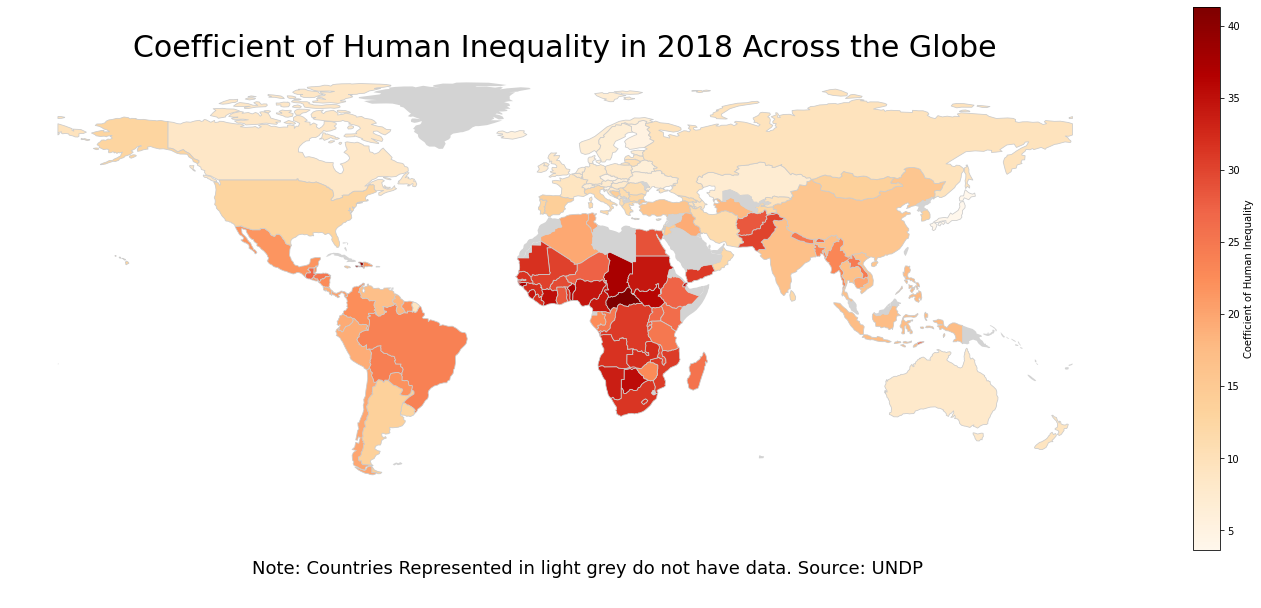

In [7]:
# Creating Choropleth for Coefficient of Human Inequality

fig, ax = plt.subplots(1, figsize=(25, 10))
merged_c_hi.plot(column='2018', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8',
                 legend=True, legend_kwds = {'label': "Coefficient of Human Inequality"})
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Coefficient of Human Inequality in 2018 Across the Globe', size = 30)
# Annotation to Explain the 0 Values fix
ax.annotate("Note: Countries Represented in light grey do not have data. Source: UNDP", 
            xy=(.2, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting countries with no data
merged_c_hi[merged_c_hi['2018'].isna()].plot(ax=ax, color='lightgrey')

#saving figure
plt.savefig("Coef Human Inequality Map.png", dpi = 300)

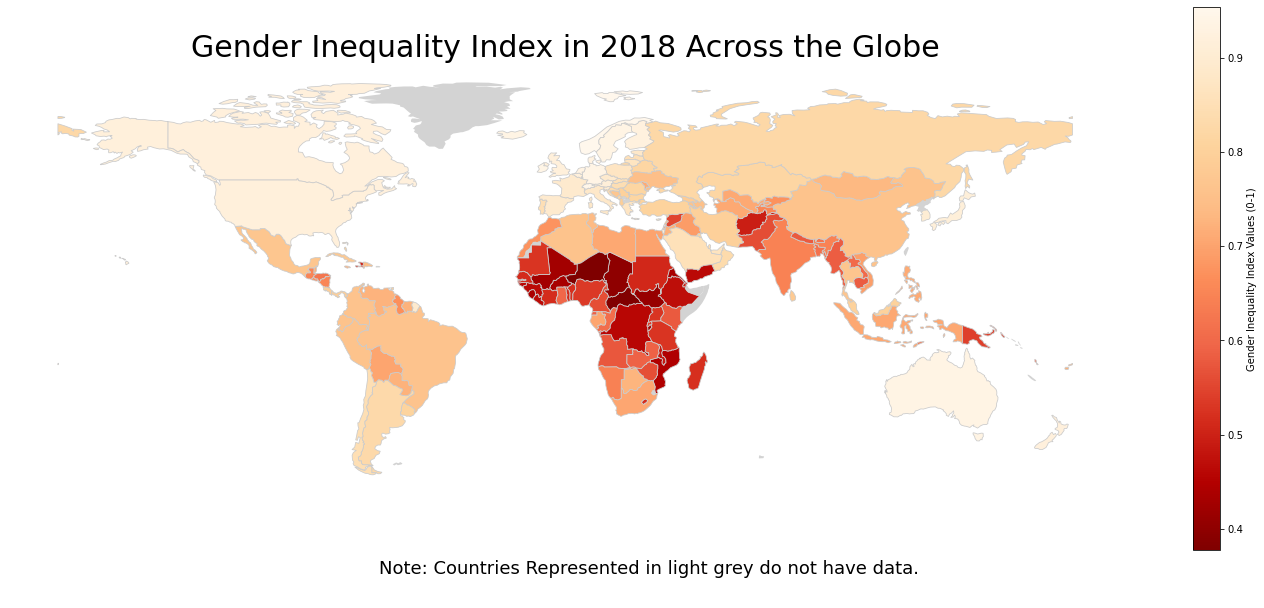

In [8]:
# Gender Inequality Index Choropleth 
fig, ax = plt.subplots(1, figsize=(25, 10))
merged_gii.plot(column='2018', cmap='OrRd_r', linewidth=0.8, ax=ax, edgecolor='.8',
                legend=True, legend_kwds = {'label': "Gender Inequality Index Values (0-1)"})
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Gender Inequality Index in 2018 Across the Globe', size = 30)
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting countries with no data
merged_gii[merged_gii["2018"].isna()].plot(ax=ax, color='lightgrey')

#saving figure
plt.savefig("GII Map.png", dpi = 300)

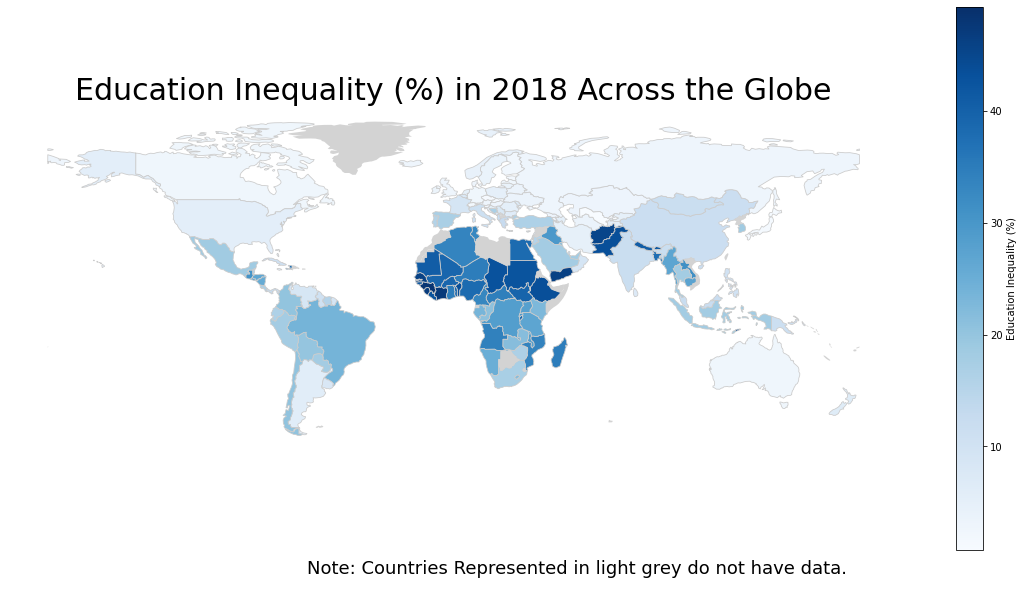

In [9]:
# EDU 
fig, ax = plt.subplots(1, figsize=(20, 10))
merged_edu.plot(column='2018', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='.8',
                legend=True, legend_kwds = {'label': "Education Inequality (%)"})
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Education Inequality (%) in 2018 Across the Globe', size = 30)
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting NaN as grey states 
merged_edu[merged_edu["2018"].isna()].plot(ax=ax, color='lightgrey')

#saving figure
plt.savefig("Education Inequality Map.png", dpi = 300)

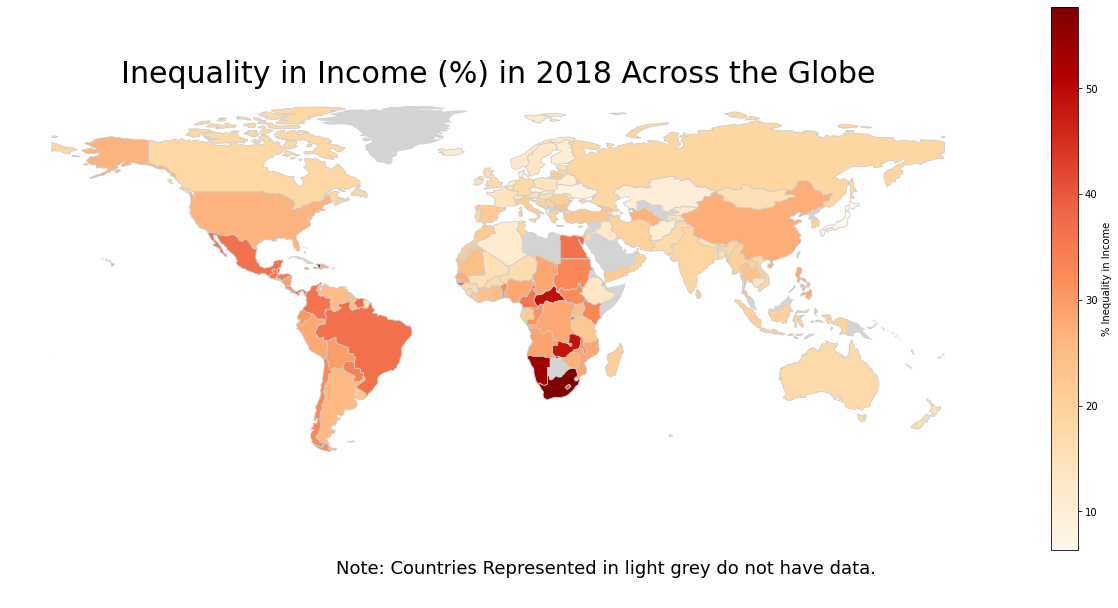

In [10]:
# Choropleth for Income Inequality (%)

fig, ax = plt.subplots(1, figsize=(22, 10))
merged_inc.plot(column='2018', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8',
                 legend=True, legend_kwds = {'label': "% Inequality in Income"})
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Inequality in Income (%) in 2018 Across the Globe', size = 30)
# Annotation to Explain the 0 Values fix
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting countries with no data
merged_inc[merged_inc['2018'].isna()].plot(ax=ax, color='lightgrey')

#saving figure
plt.savefig("Income Inequality Map.png", dpi = 300)

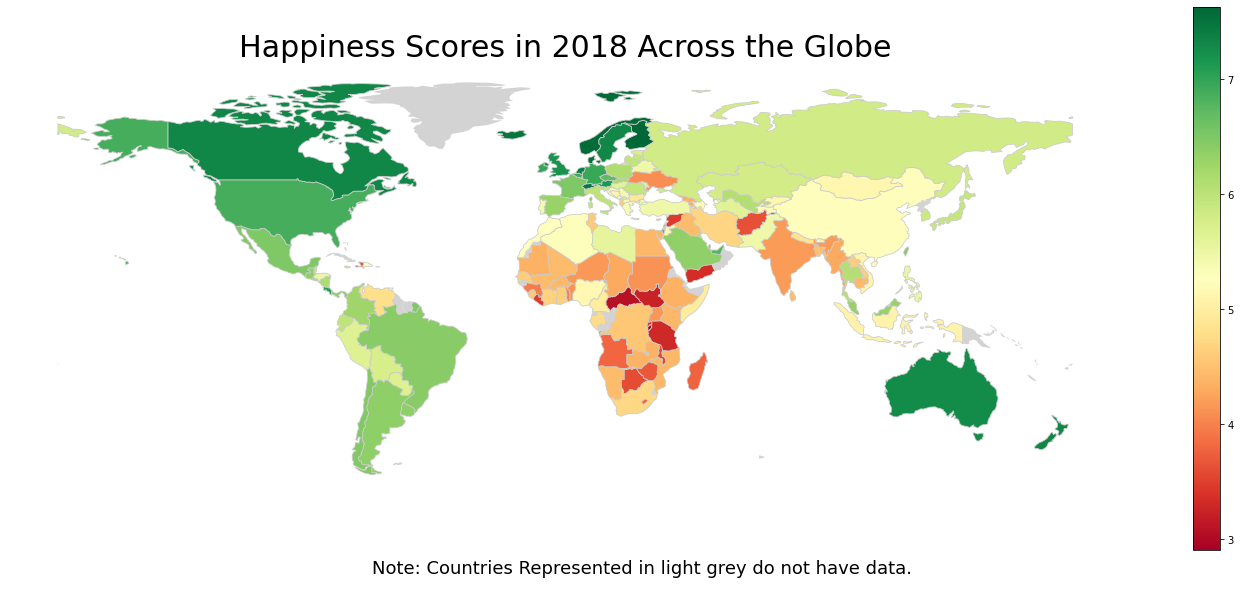

In [11]:
# 2018 Happiness
fig, ax = plt.subplots(1, figsize=(25, 10))
merged_hap_18.plot(column='Score', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='.8',
                   legend=True)
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Happiness Scores in 2018 Across the Globe', size = 30)
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting NaN as grey states 
merged_hap_18[merged_hap_18["Score"].isna()].plot(ax=ax, color='lightgrey')

#saving figure
plt.savefig("2018 Happiness Map.png", dpi = 300)

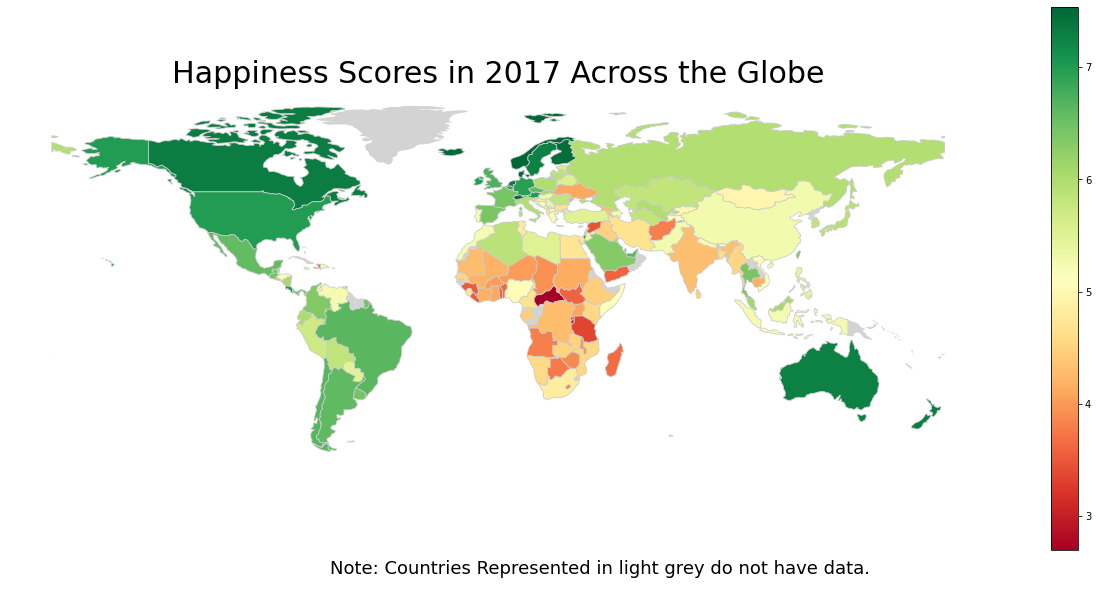

In [12]:
# 2017 Happiness 
fig, ax = plt.subplots(1, figsize=(22, 10))
merged_hap_17.plot(column='Happiness.Score', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='.8',
                   legend=True)
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Happiness Scores in 2017 Across the Globe', size = 30)
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting NaN as grey states 
merged_hap_17[merged_hap_17["Happiness.Score"].isna()].plot(ax=ax, color='lightgrey')

#saving figure
plt.savefig("2017 Happiness Map.png", dpi = 300)

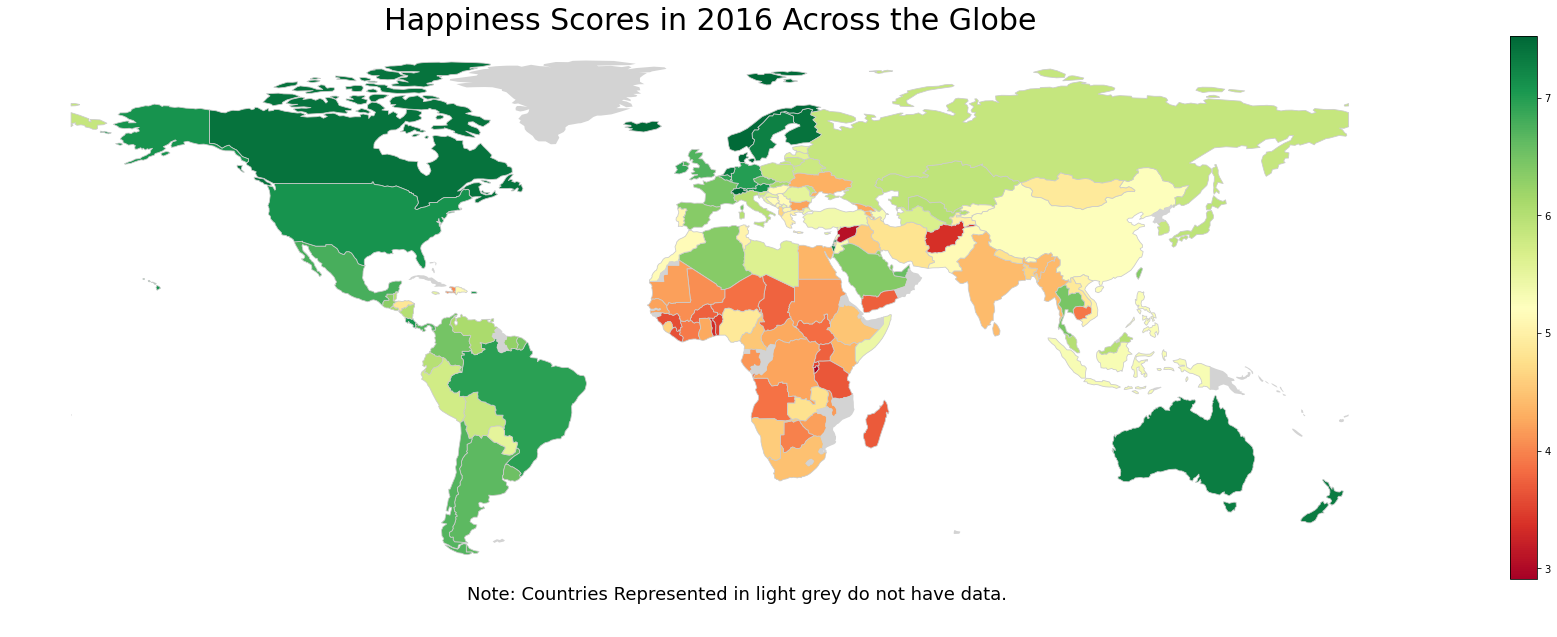

In [13]:
# 2016 Happiness 
fig, ax = plt.subplots(1, figsize=(35, 10))
merged_hap_16.plot(column='Happiness Score', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='.8',
                   legend=True)
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Happiness Scores in 2016 Across the Globe', size = 30)
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting NaN as grey states 
merged_hap_16[merged_hap_16["Happiness Score"].isna()].plot(ax=ax, color='lightgrey')

# saving figure for presentation
plt.savefig("2016 Happiness Map.png", dpi = 300)

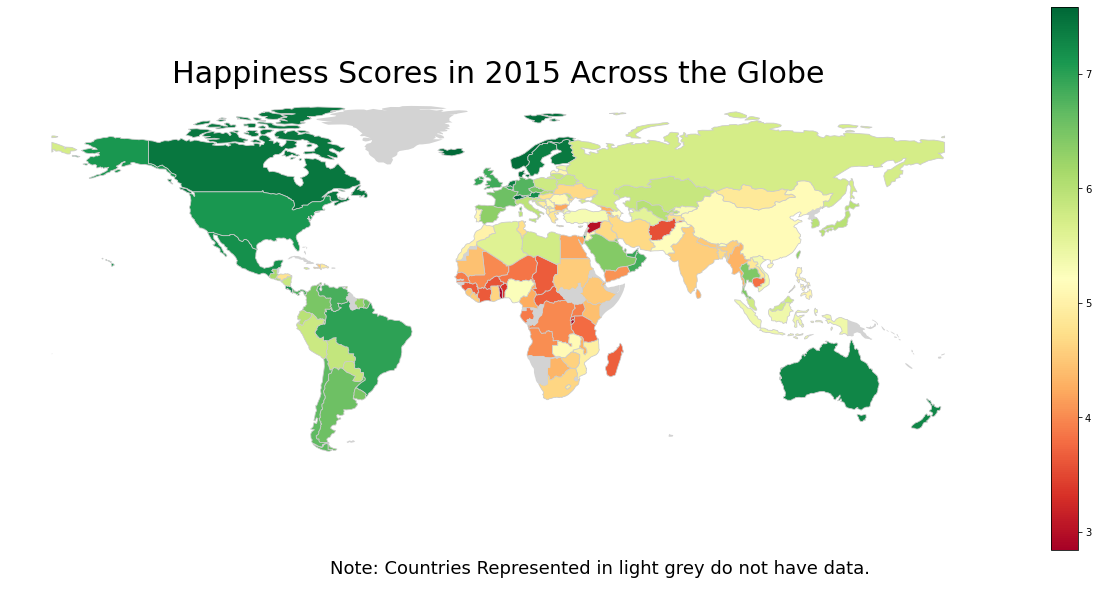

In [14]:
# 2015 Happiness
fig, ax = plt.subplots(1, figsize=(22, 10))
merged_hap_15.plot(column='Happiness Score', cmap='RdYlGn', linewidth=0.8, ax=ax,
                   edgecolor='.8', legend=True)
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Happiness Scores in 2015 Across the Globe', size = 30)
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting NaN as grey states 
merged_hap_15[merged_hap_15["Happiness Score"].isna()].plot(ax=ax, color='lightgrey')

# saving figure for presentation
plt.savefig("2015 Happiness Map.png", dpi = 300)

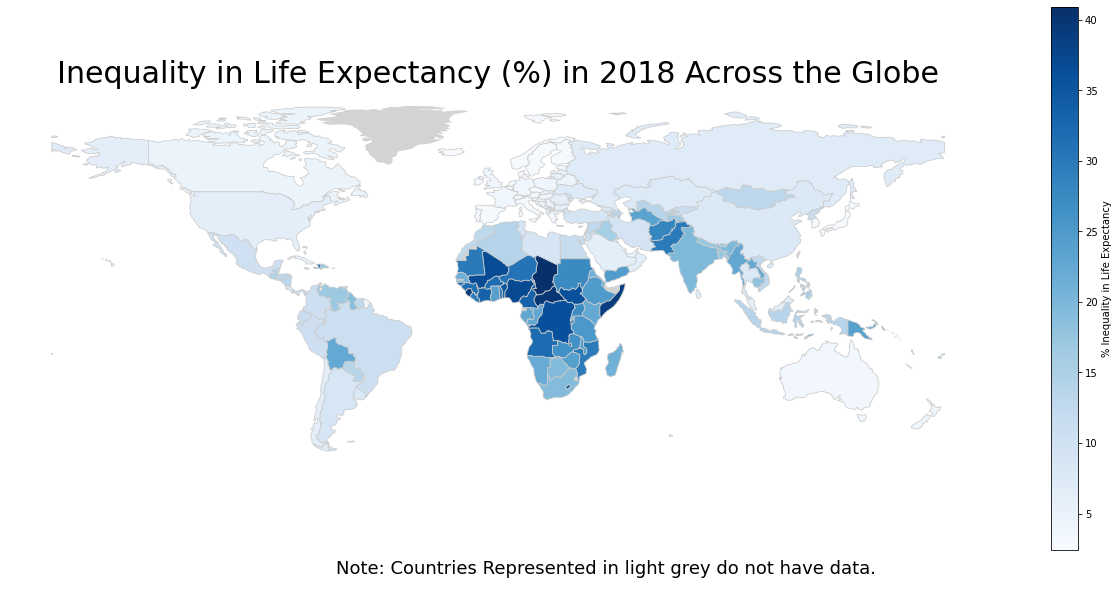

In [15]:
# Creating Choropleth for Inequality in Life Expectancy (%)
fig, ax = plt.subplots(1, figsize=(22, 10))
merged_life_exp.plot(column='2018', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',
                 legend=True, legend_kwds = {'label': "% Inequality in Life Expectancy"})
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Inequality in Life Expectancy (%) in 2018 Across the Globe', size = 30)
# Annotation to Explain the 0 Values fix
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting countries with no data
merged_life_exp[merged_life_exp['2018'].isna()].plot(ax=ax, color='lightgrey')

# saving figure for presentation
plt.savefig("INeq Life Exp.png", dpi = 300)

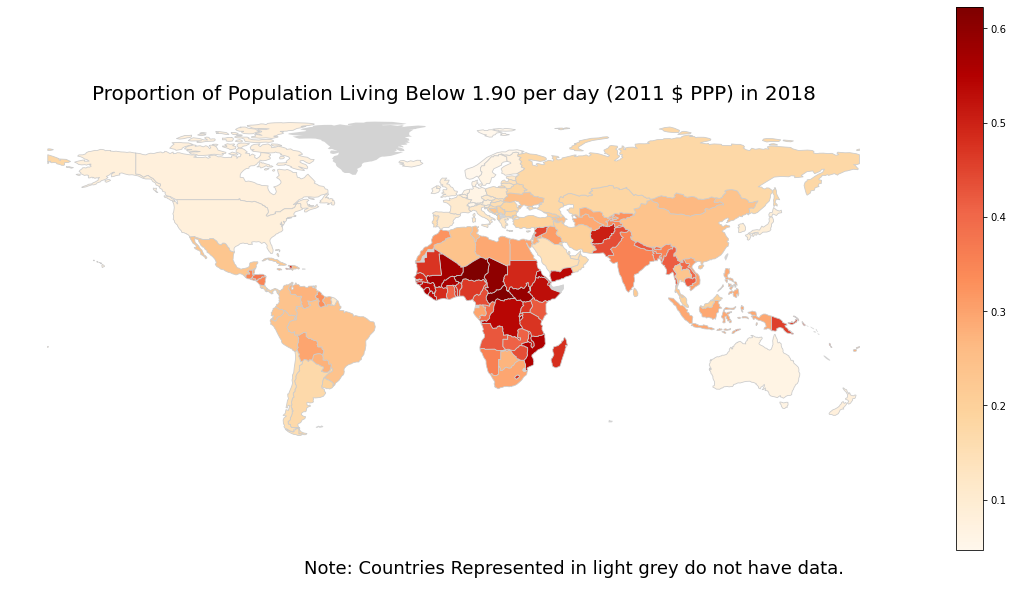

In [16]:
# Creating Choropleth for Proportion of Population Living Below 1.90 per day (2011 $ PPP)
fig, ax = plt.subplots(1, figsize=(20, 10))
merged_pov.plot(column='2018', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8',
                 legend=True)
# Removing Axis
ax.axis('off')
#Title
ax.set_title('Proportion of Population Living Below 1.90 per day (2011 $ PPP) in 2018', size = 20)

# Annotation to Explain the NA Values fix
ax.annotate("Note: Countries Represented in light grey do not have data.", 
            xy=(.3, .08), xycoords='figure fraction', 
            verticalalignment='top', fontsize=18)

# plotting countries with no data
merged_life_exp[merged_life_exp['2018'].isna()].plot(ax=ax, color='lightgrey')

# saving figure for presentation
plt.savefig("Below 1.90.png", dpi = 300)

,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1995,1.000000,0.989094,0.971785,0.926716,0.925700,0.925076,0.923477,0.919950,0.915773,0.912755,0.903836,0.896528,-0.646986,0.649555,0.785842,0.385795,0.561489,0.261559,0.133470,0.504801
2000,0.989094,1.000000,0.988644,0.963563,0.958715,0.957658,0.956421,0.954401,0.952540,0.950758,0.945500,0.940122,-0.651891,0.652475,0.792751,0.394805,0.571254,0.301464,0.163998,0.510660
2005,0.971785,0.988644,1.000000,0.982677,0.978034,0.978035,0.975406,0.972464,0.969370,0.967069,0.961786,0.957149,-0.667445,0.668111,0.808828,0.433529,0.600559,0.314089,0.151111,0.500539
2010,0.926716,0.963563,0.982677,1.000000,0.996315,0.996881,0.994638,0.991390,0.987301,0.984449,0.981056,0.977459,-0.689844,0.690309,0.818612,0.488826,0.644397,0.348387,0.151532,0.511593
2011,0.925700,0.958715,0.978034,0.996315,1.000000,0.998015,0.997335,0.995881,0.992477,0.989811,0.985728,0.982130,-0.689929,0.689848,0.818881,0.488546,0.643796,0.349002,0.155369,0.508400
2012,0.925076,0.957658,0.978035,0.996881,0.998015,1.000000,0.999229,0.997028,0.993414,0.990627,0.987209,0.983911,-0.696576,0.696256,0.826435,0.496208,0.645743,0.352411,0.153577,0.513129
2013,0.923477,0.956421,0.975406,0.994638,0.997335,0.999229,1.000000,0.999128,0.996327,0.994101,0.991139,0.988178,-0.701596,0.701281,0.832934,0.500987,0.650281,0.354336,0.155448,0.517365
2014,0.919950,0.954401,0.972464,0.991390,0.995881,0.997028,0.999128,1.000000,0.998564,0.997060,0.994669,0.992204,-0.706506,0.706275,0.837995,0.503978,0.655630,0.356687,0.160554,0.521820
2015,0.915773,0.952540,0.969370,0.987301,0.992477,0.993414,0.996327,0.998564,1.000000,0.999484,0.998139,0.996579,-0.712142,0.711991,0.842188,0.507466,0.661086,0.359945,0.166882,0.526241
2016,0.912755,0.950758,0.967069,0.984449,0.989811,0.990627,0.994101,0.997060,0.999484,1.000000,0.999288,0.998231,-0.715642,0.715900,0.846647,0.510130,0.667767,0.362219,0.171195,0.527055


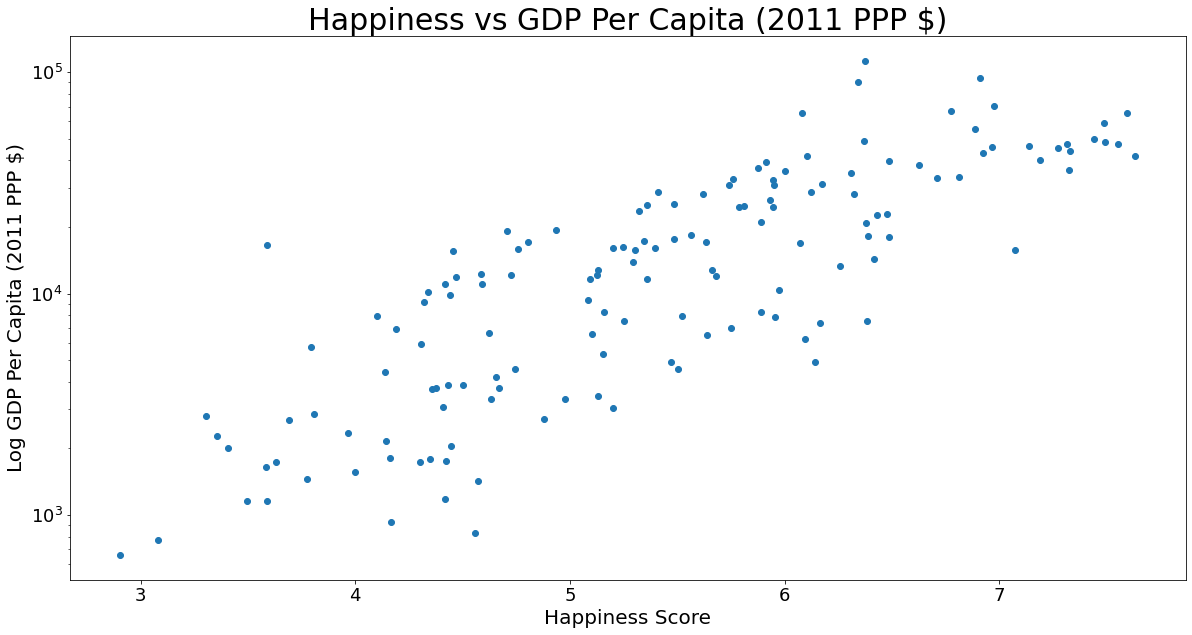

In [17]:
# scatter GDP v. Happiness

# Merging Datasets
merge_gdp_hap = gdp.join(happiness_2018)
# Setting X and Y
y = merge_gdp_hap["2018"]
x = merge_gdp_hap.Score

#Creating Figure
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x,y)
# Setting Y as logarithmic scale 
ax.set_yscale('log')

# Labels
ax.set_title("Happiness vs GDP Per Capita (2011 PPP $)", size = 30)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.set_xlabel('Happiness Score', size = 20)
ax.set_ylabel('Log GDP Per Capita (2011 PPP $)', size = 20)

merge_gdp_hap['2018'].corr(merge_gdp_hap['Score'])
merge_gdp_hap.corr()

0.7252672756126364

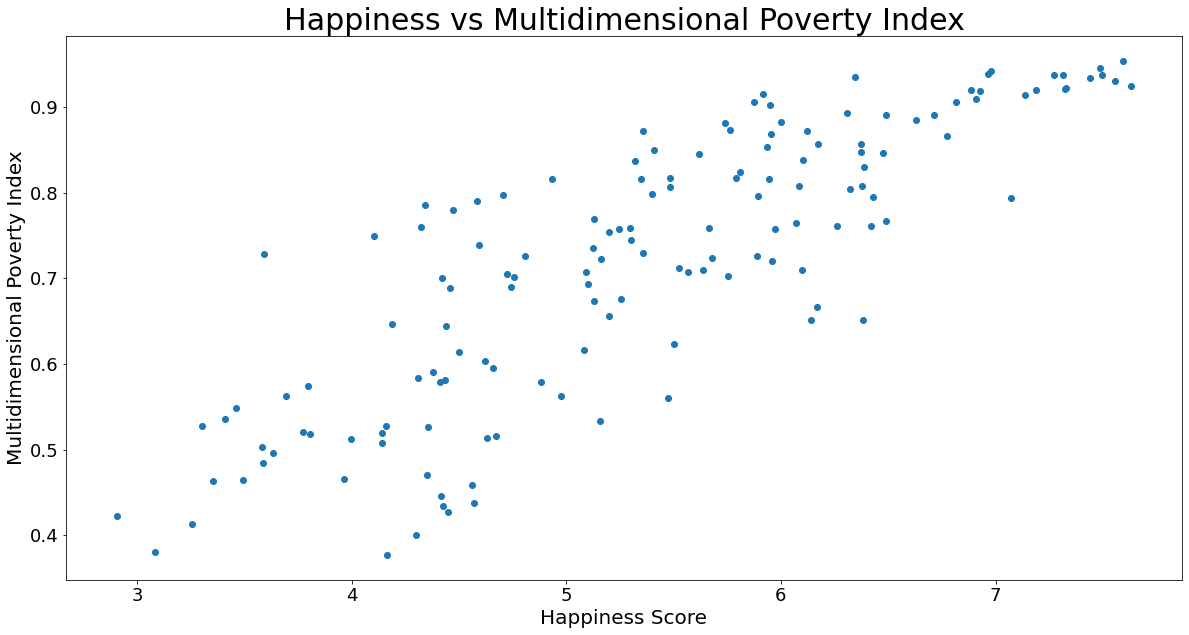

In [18]:
# scatter Poverty v. Happiness

# Merging Datasets
merge_mpi_hap = mpi.join(happiness_2018)
# Setting X and Y
y = merge_mpi_hap["2018"]
x = merge_mpi_hap.Score

#Creating Figure
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x,y)


# Labels
ax.set_title("Happiness vs Multidimensional Poverty Index", size = 30)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.set_xlabel('Happiness Score', size = 20)
ax.set_ylabel('Multidimensional Poverty Index', size = 20)


merge_gdp_hap['2018'].corr(merge_gdp_hap['Score'])
# 2018 MPI w. Happiness r value of 0.834596

-0.8345955760023052

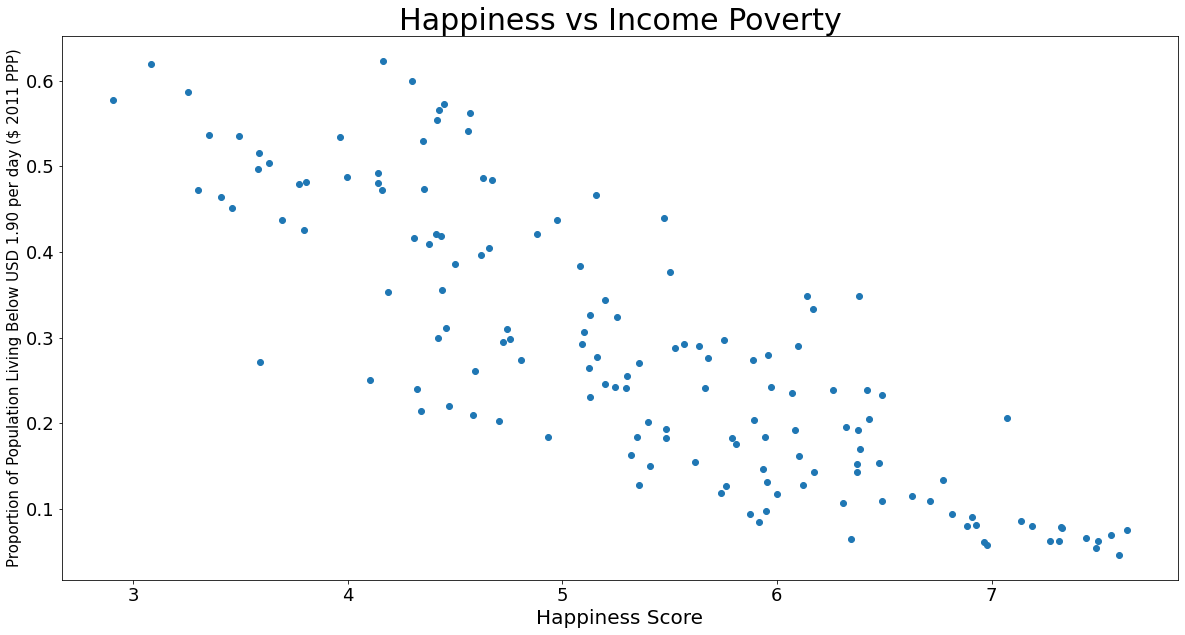

In [19]:
# Scatter Poverty v. Happiness

#INCOME POVERTY DATA SAME AS MPI DATA !!!!!!!

# Merging Datasets
merge_pov_hap = pov.join(happiness_2018)
# Setting X and Y
y = merge_pov_hap["2018"]
x = merge_pov_hap.Score

#Creating Figure
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x,y)

# Labels
ax.set_title("Happiness vs Income Poverty", size = 30)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.set_xlabel('Happiness Score', size = 20)
ax.set_ylabel('Proportion of Population Living Below USD 1.90 per day ($ 2011 PPP)', size = 15)


merge_pov_hap['2018'].corr(merge_pov_hap['Score'])

# -0.834596 r value between Happiness and Income Poverty in 2018

# US focus
### US has high inequality, but also a high GDP per capita, so absolute levels of deprivation are less than in other parts of the world, and thus we can examine the correlations between Happiness, Health, etc. in US

In [20]:
# testing correlation between gender inequality and happiness
gii_happ = gii.join(happiness_2018)

gii_happ['2018'].corr(gii_happ['Score'])

0.8343455280432792